In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import *

import sys
sys.path.append("/mnt/c/Users/ochapman/Documents/Mesirov/scRNA+ATAC/src")
from SingleCellExperiment import *

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 7
plt.rcParams["figure.figsize"] = (1.5,1.5)
plt.rcParams["figure.dpi"] = 300
plt.rcParams['svg.fonttype'] = 'none'

import os
try:
    os.mkdir('out')
except:
    pass

In [4]:
def summary_venn3(df,out_prefix=None):
    _000 = df[(df.ecDNA1_status == False) & (df.ecDNA2_status == False) & (df.ecDNA3_status == False)]
    _001 = df[~df.ecDNA1_status & ~df.ecDNA2_status & df.ecDNA3_status]
    _010 = df[~df.ecDNA1_status & df.ecDNA2_status & ~df.ecDNA3_status]
    _100 = df[df.ecDNA1_status & ~df.ecDNA2_status & ~df.ecDNA3_status]
    _101 = df[df.ecDNA1_status & ~df.ecDNA2_status & df.ecDNA3_status]
    _110 = df[df.ecDNA1_status & df.ecDNA2_status & ~df.ecDNA3_status]
    _011 = df[~df.ecDNA1_status & df.ecDNA2_status & df.ecDNA3_status]
    _111 = df[df.ecDNA1_status & df.ecDNA2_status & df.ecDNA3_status]

    subsets = (len(_100),len(_010),len(_110),len(_001),len(_101),len(_011),len(_111),len(_000))
    plt.figure()
    venn3_unweighted(subsets[:-1],set_labels=['ecDNA1','ecDNA2','ecDNA3'],alpha=0.5)
    if out_prefix != None:
        plt.savefig(out_prefix+'_venn3.svg')
        plt.savefig(out_prefix+'_venn3.png')
    return subsets
def summary_venn2(df,out_prefix=None):
    _00 = df[(df.ecDNA1_status == False) & (df.ecDNA2_status == False)]
    _01 = df[(df.ecDNA1_status == False) & (df.ecDNA2_status ==True)]
    _10 = df[(df.ecDNA1_status == True) & (df.ecDNA2_status == False)]
    _11 = df[(df.ecDNA1_status == True) & (df.ecDNA2_status == True)]

    subsets = (len(_10),len(_01),len(_11),len(_00))
    plt.figure()
    venn2_unweighted(subsets[:-1],set_labels=['ecDNA1','ecDNA2'],alpha=0.5)
    #venn2(subsets[:-1],set_labels=['ecDNA1','ecDNA2'],alpha=0.5)
    if out_prefix != None:
        plt.savefig(out_prefix+'_venn2.svg')
        plt.savefig(out_prefix+'_venn2.png')
    return subsets

(135, 17, 72, 2538)

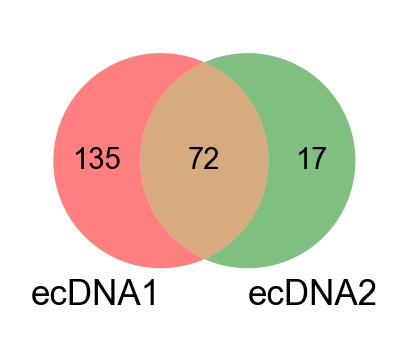

In [5]:
ht = rcmb56ht().get_qc_pass_cells()
#summary_venn2(ht,"ht_ecDNA")
summary_venn2(ht,'out/ht_ecdna')

In [12]:
ht[(ht["ecDNA1_q-val"] < 0.10) & (ht["ecDNA2_q-val"] < 0.10)]

,qc_pass_seurat,nCount_RNA,nFeature_RNA,percent.mt,nCount_ATAC,nFeature_ATAC,seurat_cluster,metacell_cluster,ecDNA1_z-score,ecDNA1_p-val,...,ecDNA2_status,ecDNA3_z-score,ecDNA3_p-val,ecDNA3_q-val,ecDNA3_status,DoubletFinder,ssGSEA_RCMB56_1,ssGSEA_RCMB56_2,cs_ecDNA1,cs_ecDNA2&3
AAGCCTTAGTTTGGGT-1,True,4040.0,2259.0,0.148515,2458.0,1290.0,0.0,26.0,9.253363,0.000999,...,True,0.299838,0.269730,0.510369,False,Singlet,-347.577001,-563.963358,NaN,NaN
AATCTTGAGATAAAGC-1,True,1893.0,1333.0,0.158479,14284.0,6143.0,6.0,13.0,8.973915,0.000999,...,True,0.158085,0.275724,0.510369,False,Singlet,1184.332652,1114.711004,False,False
AATTGCCAGGATTGAG-1,True,1524.0,1086.0,0.065617,5284.0,2669.0,6.0,23.0,10.273406,0.000999,...,True,0.394480,0.475524,0.512420,False,Singlet,911.112384,910.142797,True,False
AATTGGACAGCCTGCA-1,True,7677.0,3312.0,0.794581,22732.0,9102.0,6.0,13.0,30.508737,0.000999,...,True,0.264106,0.255744,0.510369,False,Singlet,1218.537135,1172.169835,True,False
ACATAGCTCCATAATG-1,True,1087.0,844.0,0.459982,10776.0,5053.0,10.0,18.0,10.608314,0.000999,...,True,0.373535,0.560440,0.566127,False,Singlet,418.030158,-230.732160,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTAGCAGGCGCACT-1,True,4561.0,2228.0,0.000000,1843.0,960.0,0.0,38.0,7.277889,0.000999,...,True,0.520941,0.225774,0.510369,False,Singlet,-483.373773,-1005.343886,False,False
TTACAGCAGTCCTTCA-1,True,14232.0,4627.0,0.028106,27896.0,10589.0,6.0,13.0,6.376083,0.000999,...,True,0.168728,0.297702,0.510369,False,Singlet,1059.678687,1282.861090,False,True
TTCCTTCTCCTAATTC-1,True,740.0,598.0,8.513514,17113.0,6782.0,3.0,11.0,15.075730,0.000999,...,True,0.029066,0.294705,0.510369,False,Singlet,510.772058,876.369910,True,True
TTTAGGATCAACCAAC-1,True,4737.0,2522.0,1.182183,34018.0,13009.0,6.0,13.0,10.002584,0.000999,...,True,0.015654,0.376623,0.510369,False,Singlet,1206.804875,997.049173,True,False


In [10]:
ht[ht.seurat_cluster == 11]

,qc_pass_seurat,nCount_RNA,nFeature_RNA,percent.mt,nCount_ATAC,nFeature_ATAC,seurat_cluster,metacell_cluster,ecDNA1_z-score,ecDNA1_p-val,...,ecDNA2_status,ecDNA3_z-score,ecDNA3_p-val,ecDNA3_q-val,ecDNA3_status,DoubletFinder,ssGSEA_RCMB56_1,ssGSEA_RCMB56_2,cs_ecDNA1,cs_ecDNA2&3
AACCTAATCCTACCTA-1,True,569.0,495.0,2.284710,2768.0,1442.0,11.0,18.0,1.229242,0.090909,...,False,0.165938,0.380619,0.510369,False,Singlet,-1000.964199,-15.169985,NaN,NaN
AAGGTATAGGACAATG-1,True,8369.0,3488.0,0.000000,7143.0,3481.0,11.0,NaN,0.118377,0.326673,...,False,0.110172,0.412587,0.510369,False,Singlet,-929.135047,303.746841,False,False
AAGTCTATCCCTCAGT-1,True,6622.0,3237.0,0.800362,7160.0,3561.0,11.0,11.0,7.298202,0.001998,...,False,0.131691,0.400599,0.510369,False,Singlet,999.168255,467.960396,True,False
AATCTTGAGGACCTTG-1,True,11780.0,3868.0,0.008489,8042.0,3909.0,11.0,NaN,0.308495,0.280719,...,False,0.187726,0.474525,0.512420,False,Singlet,-873.374251,191.049240,False,False
AATTGTGTCGTTAAGC-1,True,5106.0,2525.0,0.000000,5678.0,2815.0,11.0,NaN,0.223784,0.281718,...,False,0.211187,0.535465,0.546071,False,Singlet,-415.137231,167.483254,False,False
ACCTACCTCATAGACC-1,True,4767.0,2336.0,0.293686,13262.0,5900.0,11.0,18.0,0.407888,0.257742,...,False,0.106128,0.396603,0.510369,False,Singlet,-904.055424,41.534612,False,False
ACGTTACAGTATTGGC-1,True,3237.0,1909.0,0.216250,11083.0,5003.0,11.0,18.0,0.074125,0.294705,...,False,0.140580,0.374625,0.510369,False,Singlet,-963.425398,510.984885,False,False
ACTTACTTCCGGGACT-1,True,715.0,576.0,4.195804,40556.0,15611.0,11.0,11.0,0.531871,0.221778,...,False,0.119429,0.415584,0.510369,False,Singlet,530.388555,414.799462,NaN,NaN
AGCTCATAGTTGTCTT-1,True,7824.0,3480.0,0.063906,12667.0,5834.0,11.0,20.0,0.424651,0.227772,...,False,0.137262,0.318681,0.510369,False,Singlet,-842.849426,-369.704420,False,False
AGTAATGCACGTTACA-1,True,3016.0,1855.0,0.099469,11145.0,5193.0,11.0,NaN,0.157218,0.304695,...,False,0.526252,0.201798,0.510369,False,Singlet,-509.228836,244.906461,False,False


(635, 419, 8554, 12)

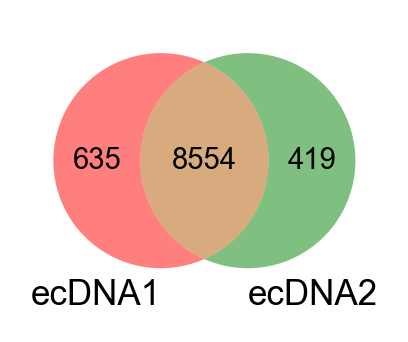

In [14]:
pdx = rcmb56pdx().get_qc_pass_cells()
summary_venn2(pdx,"pdx_ecDNA")
#summary_venn2(pdx,'pdx_ecdna_weighted')

In [6]:
ht

,qc_pass_seurat,nCount_RNA,nFeature_RNA,percent.mt,nCount_ATAC,nFeature_ATAC,seurat_cluster,metacell_cluster,ecDNA1_z-score,ecDNA1_p-val,...,ecDNA2_status,ecDNA3_z-score,ecDNA3_p-val,ecDNA3_q-val,ecDNA3_status,DoubletFinder,ssGSEA_RCMB56_1,ssGSEA_RCMB56_2,cs_ecDNA1,cs_ecDNA2&3
AAACATGCACAACAAA-1,True,1244.0,942.0,0.000000,5262.0,2438.0,6.0,14.0,0.461447,0.549451,...,False,0.246886,0.455544,0.510369,False,Singlet,-512.016512,301.122075,False,False
AAACCAACATAATCGT-1,True,6430.0,3039.0,0.279938,24495.0,9656.0,5.0,13.0,0.033687,0.304695,...,False,0.422552,0.202797,0.510369,False,Singlet,-1000.511287,735.753677,False,False
AAACCGAAGTGCACGC-1,True,4596.0,2468.0,0.174064,13282.0,6254.0,0.0,25.0,15.252073,0.000999,...,True,0.048633,0.406593,0.510369,False,Singlet,-871.129629,68.626042,True,False
AAACCGGCAGTTTGTG-1,True,8724.0,2955.0,0.000000,9000.0,4269.0,3.0,8.0,0.083100,0.364635,...,False,0.009341,0.364635,0.510369,False,Singlet,-857.438925,104.280378,False,False
AAACGCGCAGTAGGTG-1,True,6592.0,3157.0,0.015170,29998.0,12255.0,2.0,33.0,0.209807,0.300699,...,False,1.308795,0.111888,0.510369,False,Singlet,-713.231241,171.100581,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGGCAAGGTAAC-1,True,2285.0,1535.0,0.087527,9646.0,4570.0,5.0,13.0,6.743454,0.000999,...,True,0.066139,0.420579,0.510369,False,Singlet,843.928658,1230.540604,False,True
TTTGTGTTCCTGCGAA-1,True,2769.0,1655.0,0.000000,4297.0,2192.0,4.0,32.0,0.615585,0.208791,...,False,0.016635,0.328671,0.510369,False,Singlet,-288.556344,-675.597150,NaN,NaN
TTTGTGTTCGACCTGA-1,True,2225.0,1443.0,0.134831,4017.0,2007.0,0.0,37.0,0.132062,0.322677,...,False,0.139565,0.322677,0.510369,False,Singlet,-66.358115,-945.653724,NaN,NaN
TTTGTTGGTGATCAGC-1,True,3708.0,1830.0,1.618123,4202.0,2159.0,1.0,6.0,0.391852,0.256743,...,False,0.121915,0.256743,0.510369,False,Singlet,-388.676127,-421.739513,False,False
